In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

random_s = 42

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/renatomaaliw3/public_files/refs/heads/master/Data%20Sets/cluster-01.csv")
df.head()

,V1,V2,V3,V4,V5
0,54.967142,118.523551,191.980663,231.134443,216.241086
1,48.617357,138.188333,177.739011,177.952571,242.774067
2,56.476885,72.028649,151.788911,167.272045,210.379004
3,65.230299,111.259385,130.591897,199.865022,234.601923
4,47.658466,86.987149,170.946699,193.192615,155.319267


In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

principalComponents = pca.fit_transform(df_scaled)

principalDf = pd.DataFrame(data = principalComponents, columns = ['X', 'Y'])

print(principalDf.head())

          X         Y
0  0.241965  0.069303
1  0.336160 -0.111961
2 -0.177692  0.155297
3 -0.052103 -0.114969
4 -0.002994  0.180019


In [ ]:
# Scaled

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(principalDf)
df_scaled

array([[7.24708508e-01, 5.79120898e-01],
       [8.18902630e-01, 3.97856369e-01],
       [3.05051125e-01, 6.65114009e-01],
       [4.30640398e-01, 3.94848929e-01],
       [4.79749315e-01, 6.89836573e-01],
       [4.64821463e-01, 5.77512070e-01],
       [4.60724161e-01, 6.65974028e-01],
       [4.09425342e-01, 6.91150742e-01],
       [6.03146490e-01, 5.81482329e-01],
       [2.68997406e-01, 5.24290899e-01],
       [6.83177981e-01, 6.37683074e-01],
       [4.96560438e-01, 5.44430467e-01],
       [6.90243221e-01, 7.48647091e-01],
       [3.39725269e-01, 5.21490032e-01],
       [6.34062580e-01, 7.01361985e-01],
       [5.94382404e-01, 4.46663831e-01],
       [4.47203064e-01, 4.07060238e-01],
       [2.78279463e-01, 6.19514489e-01],
       [4.72130481e-01, 4.24552312e-01],
       [6.08547467e-01, 5.20567195e-01],
       [2.80097514e-01, 7.41769184e-01],
       [4.59977416e-01, 3.86763260e-01],
       [3.83480800e-01, 5.23682815e-01],
       [8.31950205e-01, 6.79429772e-01],
       [5.981506

In [ ]:
# Reconstruct to a dataframe

df_scaled = pd.DataFrame(df_scaled, columns = principalDf.columns)
df_scaled.tail(3)


,X,Y
497,0.704443,0.554531
498,0.535990,0.633125
499,0.642657,0.478208


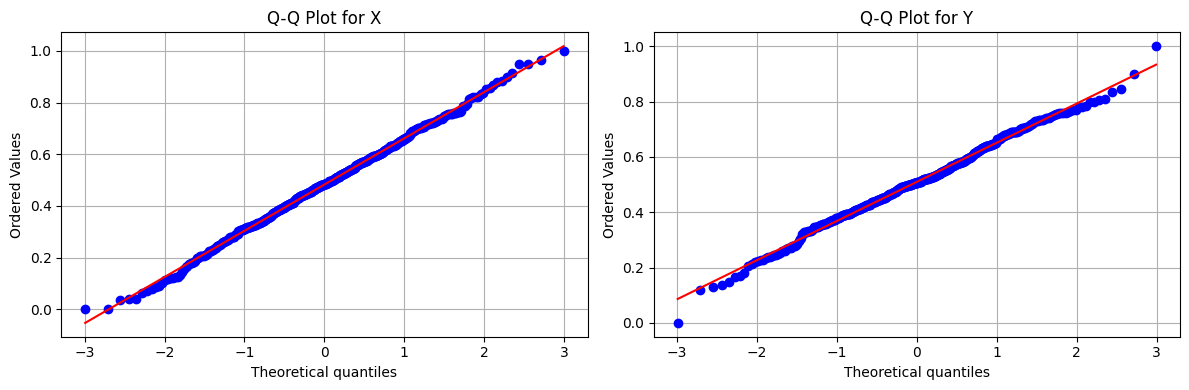

In [ ]:
# Test for Gaussianity (Normal Distribution) using Q-Q Plot

import scipy.stats as stats

# Generate Q-Q plots for X and Y

plt.figure(figsize=(12, 4))

for i, feature in enumerate(['X', 'Y'], 1):

  plt.subplot(1, 2, i) # 1 row, 2 columns
  stats.probplot(df_scaled[feature], dist = 'norm', plot = plt)
  plt.grid()
  plt.title(f'Q-Q Plot for {feature}')

plt.tight_layout()
plt.show()


In [ ]:
# Perform the Kolmogorov-Smirnov test for normality on both columns

ks_test_x = stats.kstest(df_scaled['X'], 'norm', args=(df_scaled['X'].mean(), df_scaled['X'].std()))
ks_test_y = stats.kstest(df_scaled['Y'], 'norm', args=(df_scaled['Y'].mean(), df_scaled['Y'].std()))

ks_test_x, ks_test_y

(KstestResult(statistic=0.01978760604317198, pvalue=0.9875278871995816, statistic_location=0.44019207036361796, statistic_sign=-1),
 KstestResult(statistic=0.034728539140261194, pvalue=0.5705854251661091, statistic_location=0.5301673149783348, statistic_sign=1))

In [ ]:
skewness_x = stats.skew(df_scaled['X'])
skewness_y = stats.skew(df_scaled['Y'])

skewness_x, skewness_y

(-0.03333778224683688, -0.07698998653353058)

In [ ]:
kurtosis_x = stats.kurtosis(df_scaled['X'])
kurtosis_y = stats.kurtosis(df_scaled['Y'])

kurtosis_x, kurtosis_y

(-0.03625357545034369, 0.2394352431118012)

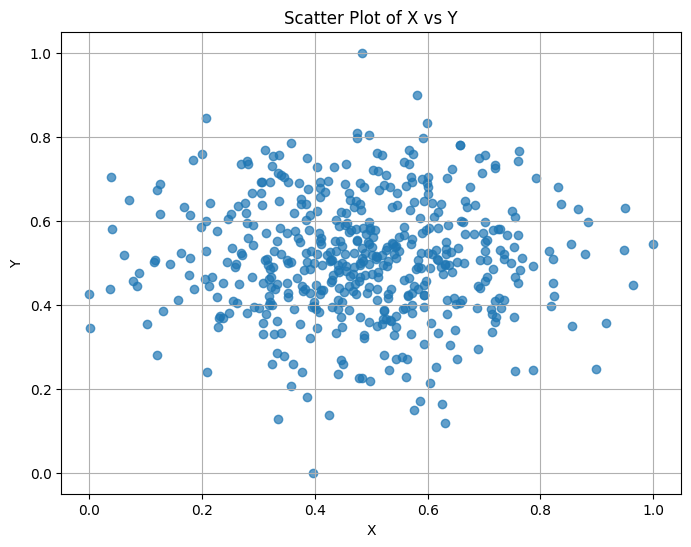

In [ ]:
# Visualize the Data

# Create a scatter plot of the original data (X vs Y)

plt.figure(figsize=(8, 6))
plt.scatter(df_scaled['X'], df_scaled['Y'], alpha=0.7)
plt.title('Scatter Plot of X vs Y')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()

In [ ]:
# prompt: Silhoutte score graph

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Create a range of cluster numbers to test
range_n_clusters = list(range(2, 11))

# Initialize lists to store silhouette scores
silhouette_scores = []

# Iterate through the range of cluster numbers and perform KMeans clustering
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=random_s)
    cluster_labels = kmeans.fit_predict(df_scaled)
    silhouette_avg = silhouette_score(df_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot the silhouette scores
plt.figure(figsize=(8, 6))
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score vs. Number of Clusters")
plt.grid(True)
plt.show()

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Assuming you have your scaled data in df_scaled

# Define a range of cluster numbers to test
range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
  # Initialize and fit KMeans
  kmeans = KMeans(n_clusters=n_clusters, random_state=random_s)
  kmeans.fit(df_scaled)

  # Calculate the silhouette score
  silhouette_avg = silhouette_score(df_scaled, kmeans.labels_)

  print(
      "For n_clusters =",
      n_clusters,
      "The average silhouette_score is :",
      silhouette_avg,
  )

For n_clusters = 2 The average silhouette_score is : 0.3383280041869276
For n_clusters = 3 The average silhouette_score is : 0.3149924672673334
For n_clusters = 4 The average silhouette_score is : 0.32159876773413876
For n_clusters = 5 The average silhouette_score is : 0.3262594476000283
For n_clusters = 6 The average silhouette_score is : 0.35382968645065266


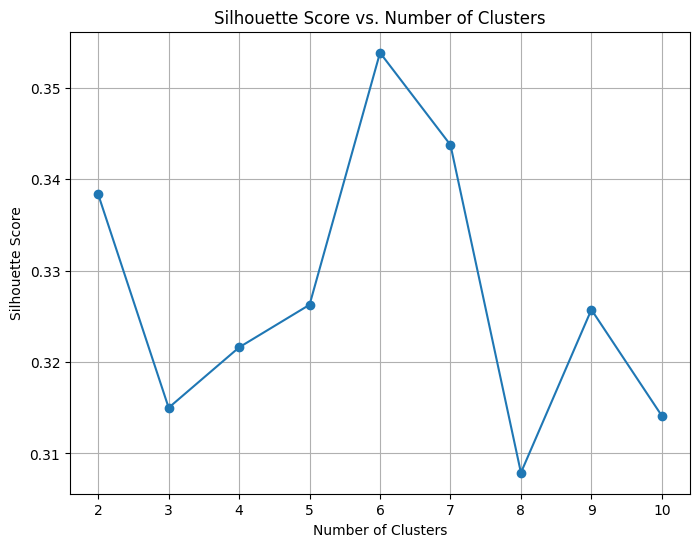

In [ ]:
from sklearn.metrics import silhouette_score

# Create a range of cluster numbers to test
range_n_clusters = list(range(2, 11))

# Initialize lists to store silhouette scores
silhouette_scores = []

# Iterate through the range of cluster numbers and perform KMeans clustering
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=random_s)
    cluster_labels = kmeans.fit_predict(df_scaled)
    silhouette_avg = silhouette_score(df_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot the silhouette scores
plt.figure(figsize=(8, 6))
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score vs. Number of Clusters")
plt.grid(True)
plt.show()